In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import lmfit
import numpy as np
from astropy.io import ascii
from astropy import units as u
from lmfit.models import PolynomialModel, GaussianModel
from lmfit import Model as mod
from lmfit import minimize, Parameters, report_fit

In [2]:
# Open the file in read mode
with open('C:/Users/dhami/Research/STARTastro/DhamiBusch-Research25/OHData/158375n19250_67_ii.ascii', 'r') as file:
    # Read the content of the file
    content = file.read()
# Print the content
print(content)

Scan:      6     158375-19250 2023-10-13 +11 50 50.5
          RADIO                  Ta    
        km/s-LSR                 I
       -991.2192478067138     -0.1969397
       -990.2933378069390     -0.1929289
       -989.3674278072308     -0.1956574
       -988.4415178075227     -0.1915557
       -987.5156078077479     -0.1923949
       -986.5896978079732     -0.1951241
       -985.6637878082649     -0.1991728
       -984.7378778085567     -0.1947215
       -983.8119678087820     -0.1947283
       -982.8860578090738     -0.1967613
       -981.9601478093656     -0.1939715
       -981.0342378095910     -0.1937665
       -980.1083278098828     -0.1967330
       -979.1824178101081     -0.1971419
       -978.2565078103999     -0.1927554
       -977.3305978106916     -0.1880428
       -976.4046878109169     -0.1871430
       -975.4787778111421     -0.1896689
       -974.5528678114340     -0.1897209
       -973.6269578117258     -0.1900757
       -972.7010478119511     -0.1826919
       -971

In [5]:
len(content)

134485

In [9]:
# Replace 'file_path.txt' with the path to your ASCII file
file_path = 'C:/Users/dhami/Research/STARTastro/DhamiBusch-Research25/OHData/158375n19250_67_ii.ascii'
data = ascii.read(file_path, data_start=4)
x=data['col1']
y=data['col2']

In [10]:
# Load the ASCII file into a DataFrame
df = pd.read_csv(file_path)  # Example: tab-delimited file
# said low_memory=False so it reads whole file instead of guessing
# Display the first few rows of the DataFrame
print(data)

       col1             col2    
------------------ -------------
 -990.293337806939    -0.1929289
-989.3674278072308    -0.1956574
-988.4415178075227    -0.1915557
-987.5156078077479    -0.1923949
-986.5896978079732    -0.1951241
-985.6637878082649    -0.1991728
-984.7378778085567    -0.1947215
 -983.811967808782    -0.1947283
-982.8860578090738    -0.1967613
-981.9601478093656    -0.1939715
 -981.034237809591    -0.1937665
-980.1083278098828     -0.196733
-979.1824178101081    -0.1971419
               ...           ...
 2030.950991334544  -0.007642043
 2031.876901334286  -0.007933455
  2032.80281133406  0.0008266279
 2033.728721333768   0.006281571
  2034.65463133351 -0.0001936971
 2035.580541333251  -0.001893848
  2036.50645133296  -0.004103886
 2037.432361332701   0.003867748
 2038.358271332476  0.0004104335
 2039.284181332184   0.002818394
 2040.210091331925   0.004463519
 2041.136001331667  0.0004873652
 2042.061911331375 -0.0001480994
Length = 3276 rows


C:\Users\dhami\AppData\Local\Temp\ipykernel_384\1089076612.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


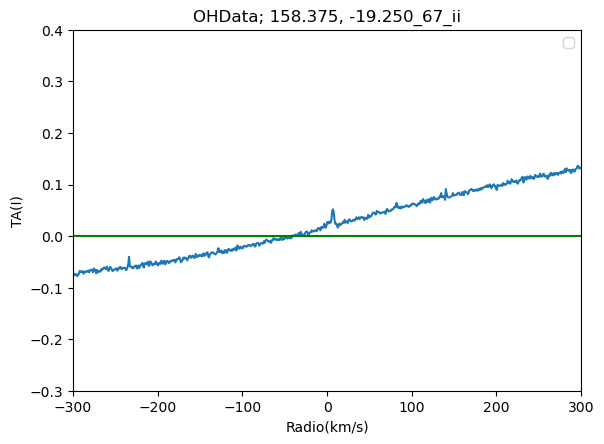

In [11]:
gooddata = np.where((x >= -300) & (x <= 300))
x = x[gooddata]
y = y[gooddata]

plt.xlim([-300, 300])
plt.ylim([-.30, .40])
plt.plot(x,y)
plt.axhline(0, color='green')
plt.xlabel('Radio(km/s)') # Creates a label for the x axis
plt.ylabel('TA(I)') # Creates a label for the y axis
plt.title('OHData; 158.375, -19.250_67_ii') # Creates a title for the plot
plt.legend()
plt.tight_layout(pad=2.0) # so data doesn't overlap

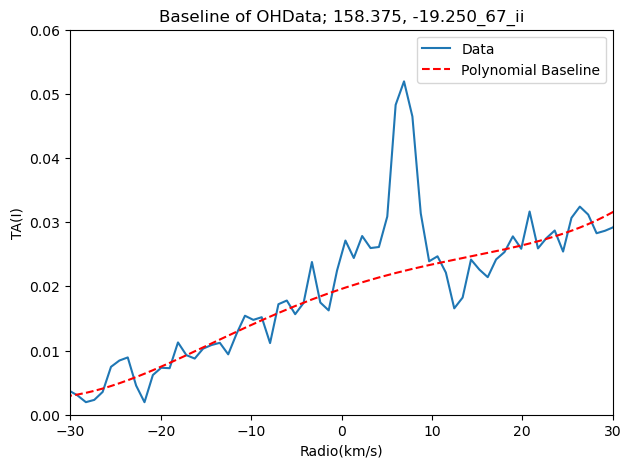

In [25]:
#Create a model and set initial parameters
degree = 4
poly_model = PolynomialModel(degree=degree)

# Baseline regions:
gooddata1 = list(np.where((x >= -30) & (x <= 0))[0])
gooddata2 = list(np.where((x >= 15) & (x <= 30))[0])
gooddata = gooddata1 + gooddata2

# Do the fitting:
params = poly_model.guess(y[gooddata], x=x[gooddata])
result = poly_model.fit(y[gooddata], params, x=x[gooddata])

#params =  poly_model.guess(y, x=x)
#result = poly_model.fit(y, params, x=x
#print(result.fit_report())
# generates fitted values
y_eval = poly_model.eval(result.params, x=x)

# Plot data and baseline
plt.figure(figsize=(7, 5))
plt.xlim([-30, 30])
plt.ylim([0, .06])
plt.plot(x, y, label='Data')
#plt.axhline(0, color='green')
plt.plot(x, y_eval, label='Polynomial Baseline', color='red', linestyle='--')
plt.xlabel('Radio(km/s)')
plt.ylabel('TA(I)')
plt.title('Baseline of OHData; 158.375, -19.250_67_ii')
plt.legend()
plt.show()

In [15]:
# Subtract Baseline
y_sub = y-y_eval

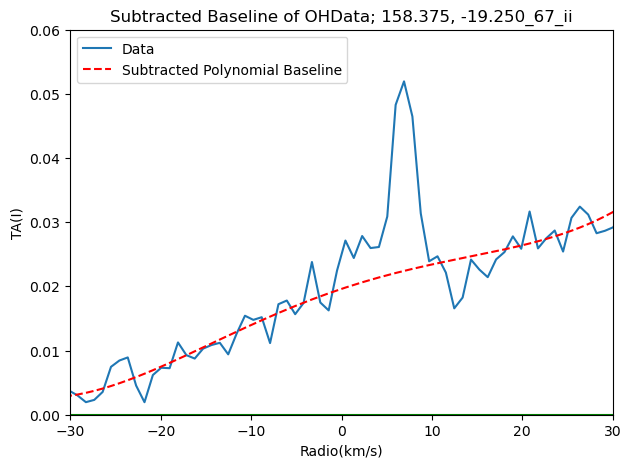

In [18]:
# Baseline regions:
gooddata1 = list(np.where((x >= -30) & (x <= 0))[0])
gooddata2 = list(np.where((x >= 15) & (x <= 30))[0])
gooddata = gooddata1 + gooddata2
# Do the fitting:
params = poly_model.guess(y_sub[gooddata], x=x[gooddata])
result = poly_model.fit(y_sub[gooddata], params, x=x[gooddata])
# Plot data and baseline
plt.figure(figsize=(7, 5))
plt.xlim([-30, 30])
plt.ylim([0, .06])
plt.axhline(0, color='green')
plt.plot(x, y, label='Data')
plt.plot(x, y_eval, label='Subtracted Polynomial Baseline', color='red', linestyle='--')
plt.xlabel('Radio(km/s)')
plt.ylabel('TA(I)')
plt.title('Subtracted Baseline of OHData; 158.375, -19.250_67_ii')
plt.legend()
plt.show()

In [40]:
# RMS red
noise=np.std(y[gooddata]) * u.K
noise

<Quantity 0.01098429 K>

In [39]:
noise_sub=np.std(y_sub[gooddata]) * u.K
noise_sub
#noise_sub.to('mK')

<Quantity 0.00581452 K>

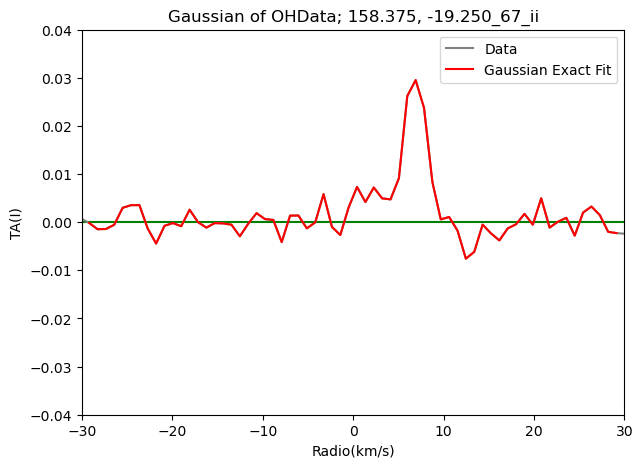

In [19]:
# Gaussian Model-exact fit
gauss_model=GaussianModel()
region = np.where((x >= -30) & (x <= 30))[0]
# Plot data and baseline
plt.figure(figsize=(7, 5))
plt.axhline(0, color='green')
plt.plot(x, y_sub, label='Data', linestyle='solid', color='grey')
plt.xlim([-30, 30])
plt.ylim([-.04, .04])
plt.plot(x[region], y_sub[region], '-',label='Gaussian Exact Fit',color='r')
plt.xlabel('Radio(km/s)') # Creates a label for the x axis
plt.ylabel('TA(I)') # Creates a label for the y axis
plt.title('Gaussian of OHData; 158.375, -19.250_67_ii') # Creates a title for the plot
plt.legend()
plt.show()

In [20]:
# # Over fit of Gaussian
# params = gauss_model.guess(y_sub[region], x=x[region])
# regionfit = gauss_model.fit(y_sub[region], params, x=x[region])
# y_gauss_region = gauss_model.eval(params, x=x)
# #plot

# plt.axhline(0, color='k')
# plt.plot(x, y_sub, label='Data', linestyle='solid', color='grey')
# plt.xlim([-30, 30])
# plt.ylim([-.04, .04])
# plt.step(x, y_gauss_region, '-',label='Gaussian Guess',color='r')
# plt.xlabel('Radio(km/s)') # Creates a label for the x axis
# plt.ylabel('TA(I)') # Creates a label for the y axis
# plt.title('Gaussian of OHData; 158.375, -19.250_67_ii') # Creates a title for the plot
# plt.legend()
# plt.show()

In [21]:
# Better fit of Gaussian
def gaussFit(vel, ta, bounds):
    '''
    Purpose:
    This function fits 4 features in a single spectrum, the features assumed to be the Local arm, inter arm, perseus arm, and outer arm.
    
    Input:
    vel -- x axes, velocity
    ta -- y axes, antenna temperature
    bounds -- an array of bounds for np.where commands later in the function to setup fit ranges.
    n = number of gaussian components

    Output:
    fitResult -- an array of 3 fit results from LMFIT for a single gaussian
    '''
    x=vel 
    y_sub=ta
    # Set bounds:
    region = np.where((x >= bounds[0]) & (x <= bounds[1]))[0]
    # Initial Guess of the parameters
    params = gauss_model.guess(y_sub[region], x=x[region])
    # Actual best fit to the data, given initial guess
    regionfit= gauss_model.fit(y_sub[region], params, x=x[region])
    #fitresult = [region1fit, region2fit, region3fit]
    fitresult = [regionfit]
    return fitresult

In [22]:
fitResult = gaussFit(x, y_sub, bounds = [-30, 30])

C:\Users\dhami\miniforge3\envs\STARTastro\Lib\site-packages\uncertainties\core.py:1024: UserWarning: Using UFloat objects with std_dev==0 may give unexpected results.
  warn("Using UFloat objects with std_dev==0 may give unexpected results.")


In [23]:
fitResult[0].params

name,value,standard error,relative error,initial value,min,max,vary,expression
amplitude,0.09659905,0.00709577,(7.35%),0.10307787447401998,-inf,inf,True,
center,6.82070734,0.10542764,(1.55%),6.911731909668561,-inf,inf,True,
sigma,1.24298313,0.10542851,(8.48%),0.9259099997581046,0.00000000,inf,True,
fwhm,2.92700152,0.24826517,(8.48%),2.18035138563038,-inf,inf,False,2.3548200*sigma
height,0.03100400,0.00227741,(7.35%),0.044412658176842285,-inf,inf,False,"0.3989423*amplitude/max(1e-15, sigma)"


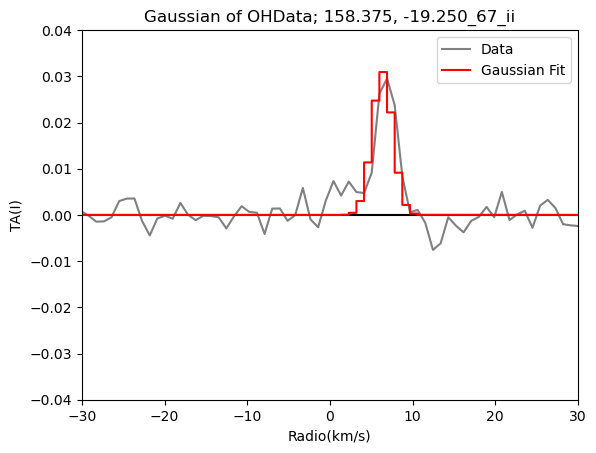

In [24]:
y_gauss_region = gauss_model.eval(fitResult[0].params, x=x)
# plot
plt.plot(x, y_sub, label='Data', linestyle='solid', color='grey')
plt.axhline(0, color='k')
plt.xlim([-30, 30])
plt.ylim([-.04, .04])
plt.step(x, y_gauss_region, '-',label='Gaussian Fit',color='red')
plt.xlabel('Radio(km/s)') # Creates a label for the x axis
plt.ylabel('TA(I)') # Creates a label for the y axis
plt.title('Gaussian of OHData; 158.375, -19.250_67_ii') # Creates a title for the plot
plt.legend()
plt.show()